In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

# Load

In [2]:
df_train = pd.read_csv('data/application_train.csv')
df_test = pd.read_csv('data/application_test.csv')

df_train.columns = [col.lower() for col in df_train.columns]
df_test.columns = [col.lower() for col in df_test.columns]

df_train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA Workspace

In [3]:
def perc_null(col):
    '''
    Makes a pretty print out of the percent of null values in each column
    '''
    print('\n', '-' * 50, '\n', col, '\n')
    train_null = len(df_train[df_train[col].isnull()])
    test_null = len(df_test[df_test[col].isnull()])
    if train_null == 0:
        print('Train: 0')
    else:
        print('Train: ', train_null)
        print(round(train_null/len(df_train), 3))
    if test_null == 0:
        print('Test: 0')
    else:
        print('Test: ', test_null)
        print(round(test_null/len(df_test), 3))

In [4]:
for col in df_train.columns.tolist()[2:]:
    perc_null(col)


 -------------------------------------------------- 
 name_contract_type 

Train: 0
Test: 0

 -------------------------------------------------- 
 code_gender 

Train: 0
Test: 0

 -------------------------------------------------- 
 flag_own_car 

Train: 0
Test: 0

 -------------------------------------------------- 
 flag_own_realty 

Train: 0
Test: 0

 -------------------------------------------------- 
 cnt_children 

Train: 0
Test: 0

 -------------------------------------------------- 
 amt_income_total 

Train: 0
Test: 0

 -------------------------------------------------- 
 amt_credit 

Train: 0
Test: 0

 -------------------------------------------------- 
 amt_annuity 

Train:  12
0.0
Test:  24
0.0

 -------------------------------------------------- 
 amt_goods_price 

Train:  278
0.001
Test: 0

 -------------------------------------------------- 
 name_type_suite 

Train:  1292
0.004
Test:  911
0.019

 -------------------------------------------------- 
 name_income_type 

T

Train:  210199
0.684
Test:  32780
0.672

 -------------------------------------------------- 
 livingarea_medi 

Train:  154350
0.502
Test:  23552
0.483

 -------------------------------------------------- 
 nonlivingapartments_medi 

Train:  213514
0.694
Test:  33347
0.684

 -------------------------------------------------- 
 nonlivingarea_medi 

Train:  169682
0.552
Test:  26084
0.535

 -------------------------------------------------- 
 fondkapremont_mode 

Train:  210295
0.684
Test:  32797
0.673

 -------------------------------------------------- 
 housetype_mode 

Train:  154297
0.502
Test:  23619
0.485

 -------------------------------------------------- 
 totalarea_mode 

Train:  148431
0.483
Test:  22624
0.464

 -------------------------------------------------- 
 wallsmaterial_mode 

Train:  156341
0.508
Test:  23893
0.49

 -------------------------------------------------- 
 emergencystate_mode 

Train:  145755
0.474
Test:  22209
0.456

 -----------------------------------

Percent of defaults in training df

In [5]:
round(len(df_train[df_train['target'] == 1])/len(df_train), 4)

0.0807

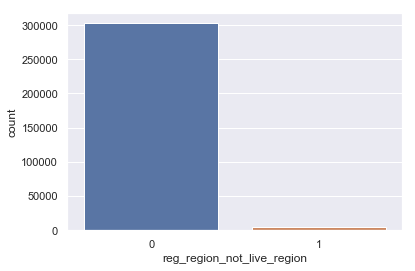

In [6]:
sns.countplot(df_train['reg_region_not_live_region'])

# Drop Columns

These columns contain normalized information about where the client lives. Each column is missing about 45-70% of the data. Could be used in the future but not low hanging fruit.

note*, using different indices for df_test because there is no 'target' column

In [7]:
df_train.drop(df_train.columns[range(44, 91)], inplace=True, axis=1)
df_test.drop(df_test.columns[range(43, 90)], inplace=True, axis=1)

These columns were either viewed as not important or highly correlated with another feature during EDA

In [8]:
drop_cols = [
    'weekday_appr_process_start',
    'region_rating_client_w_city',
    'obs_60_cnt_social_circle',
    'def_60_cnt_social_circle',
    'amt_req_credit_bureau_hour',
    'amt_req_credit_bureau_week',
    'amt_req_credit_bureau_mon',
    'amt_req_credit_bureau_year'
]

for col in drop_cols:
    df_train.drop(col, inplace=True, axis=1)
    df_test.drop(col, inplace=True, axis=1)

These columns could be worth some imputing in the future if there's time

In [9]:
imputable_cols = [
    'own_car_age',
    'occupation_type',
    'ext_source_1',
    'ext_source_3',
    'amt_req_credit_bureau_day',
    'amt_req_credit_bureau_qrt'
]

for col in imputable_cols:
    df_train.drop(col, inplace=True, axis=1)
    df_test.drop(col, inplace=True, axis=1)

There should only be 61 columns now in the train and 60 in the test, down from 122/121

In [10]:
print(df_train.shape)
print(df_test.shape)

(307511, 61)
(48744, 60)


# Clean and Bin

Impute a few values and turn strings into 1 and 0's. Just this simple stuff here.

## Gender

Change 'M' and 'F' to 1 and 0 respectively. 'XAN' is assumed to be female.

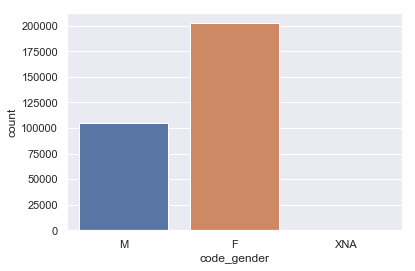

In [11]:
np.unique(df_train['code_gender'])
sns.countplot(df_train['code_gender'])

In [12]:
idxs = df_train[df_train['code_gender'] == 'XNA'].index

for idx in idxs:
    df_train.at[idx, 'code_gender'] = 'F'
np.unique(df_train['code_gender'])

array(['F', 'M'], dtype=object)

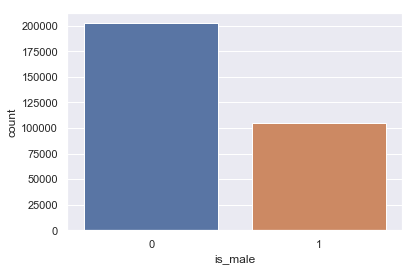

In [13]:
foo = lambda x: 1 if x == 'M' else 0
df_train['code_gender'] = df_train['code_gender'].apply(foo)
df_train.rename(columns={'code_gender': 'is_male'}, inplace=True)
df_test.rename(columns={'code_gender': 'is_male'}, inplace=True)
sns.countplot(df_train['is_male'])

## Car

Change 'Y' and 'N' to 1 and 0 respectively.

['N' 'Y']


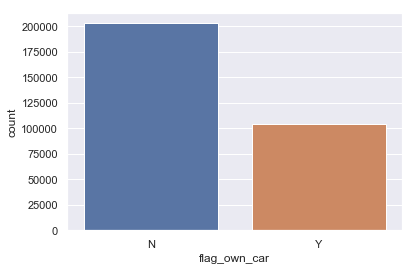

In [14]:
print(np.unique(df_train['flag_own_car']))
sns.countplot(df_train['flag_own_car'])

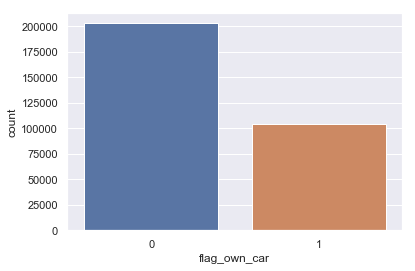

In [15]:
foo = lambda x: 1 if x == 'Y' else 0
df_train['flag_own_car'] = df_train['flag_own_car'].apply(foo)
sns.countplot(df_train['flag_own_car'])

## Realty

Change 'Y' and 'N' to 1 and 0 respectively.

['N' 'Y']


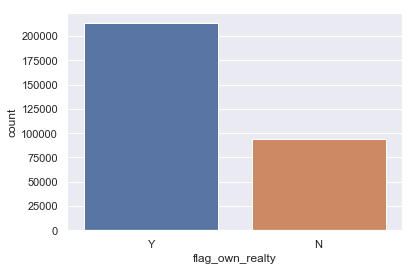

In [16]:
print(np.unique(df_train['flag_own_realty']))
sns.countplot(df_train['flag_own_realty'])

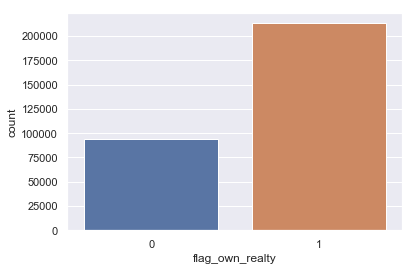

In [17]:
foo = lambda x: 1 if x == 'Y' else 0
df_train['flag_own_realty'] = df_train['flag_own_realty'].apply(foo)
sns.countplot(df_train['flag_own_realty'])

## Amount of Annuity

Imputing the median

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


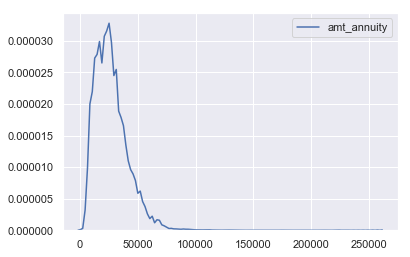

In [18]:
x = df_train[~df_train['amt_annuity'].isnull()]['amt_annuity']
sns.kdeplot(x)

In [19]:
median = df_train['amt_annuity'].median()
print(median)

24903.0


In [20]:
idxs = df_train[df_train['amt_annuity'].isnull()]['amt_annuity'].index

for idx in idxs:
    df_train.at[idx, 'amt_annuity'] = median

idxs = df_test[df_test['amt_annuity'].isnull()]['amt_annuity'].index

for idx in idxs:
    df_test.at[idx, 'amt_annuity'] = median

## Amount of Good Price

Imputing the median

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


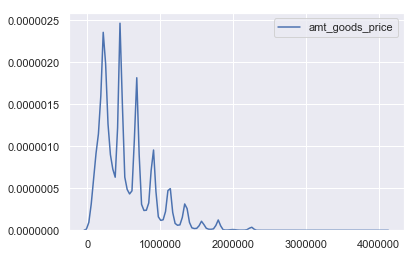

In [21]:
x = df_train[~df_train['amt_goods_price'].isnull()]['amt_goods_price']
sns.kdeplot(x)

In [22]:
median = df_train['amt_goods_price'].median()
print(median)

450000.0


In [23]:
idxs = df_train[df_train['amt_goods_price'].isnull()]['amt_goods_price'].index

for idx in idxs:
    df_train.at[idx, 'amt_goods_price'] = median

idxs = df_test[df_test['amt_goods_price'].isnull()]['amt_goods_price'].index

for idx in idxs:
    df_test.at[idx, 'amt_goods_price'] = median

## Count of Family Members

Imputing the mode

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


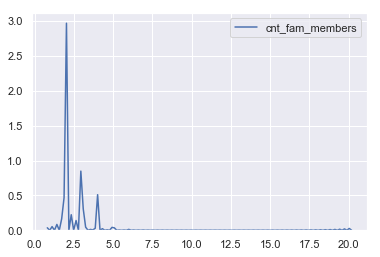

In [24]:
x = df_train[~df_train['cnt_fam_members'].isnull()]['cnt_fam_members']
sns.kdeplot(x)

In [25]:
mode = stats.mode(df_train['cnt_fam_members'])[0][0]
mode

2.0

In [26]:
idxs = df_train[df_train['amt_goods_price'].isnull()]['amt_goods_price'].index

for idx in idxs:
    df_train.at[idx, 'amt_goods_price'] = mode

idxs = df_test[df_test['amt_goods_price'].isnull()]['amt_goods_price'].index

for idx in idxs:
    df_test.at[idx, 'amt_goods_price'] = mode

## Region Rating Client

Turn this into (1 & 3) vs. 2

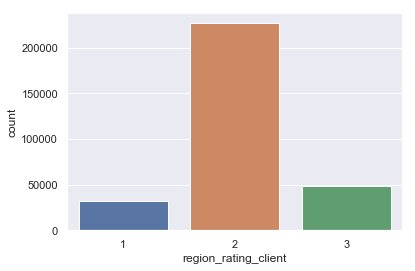

In [27]:
sns.countplot(df_train['region_rating_client'])

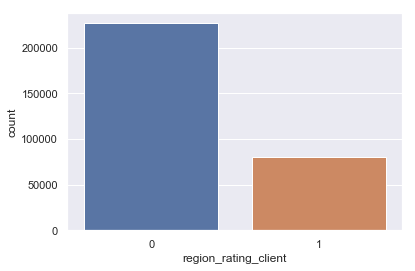

In [28]:
foo = lambda x: 1 if x != 2 else 0
df_train['region_rating_client'] = df_train['region_rating_client'].apply(foo)
df_test['region_rating_client'] = df_test['region_rating_client'].apply(foo)
sns.countplot(df_train['region_rating_client'])

## Hour Appr Process Start

Turn this into binary value of completed during business hours (9am-5pm) or not

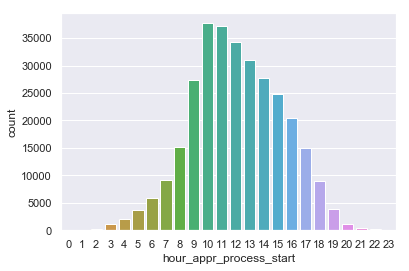

In [29]:
sns.countplot(df_train['hour_appr_process_start'])

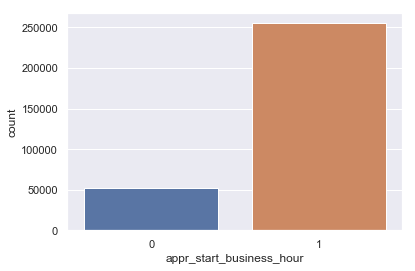

In [30]:
foo = lambda x: 1 if x in range(9,18) else 0
df_train['hour_appr_process_start'] = df_train['hour_appr_process_start'].apply(foo)
df_test['hour_appr_process_start'] = df_test['hour_appr_process_start'].apply(foo)
df_train.rename(columns={'hour_appr_process_start': 'appr_start_business_hour'}, inplace=True)
df_test.rename(columns={'hour_appr_process_start': 'appr_start_business_hour'}, inplace=True)
sns.countplot(df_train['appr_start_business_hour'])

## EXT Source 2

Imputing median

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/blairthurman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


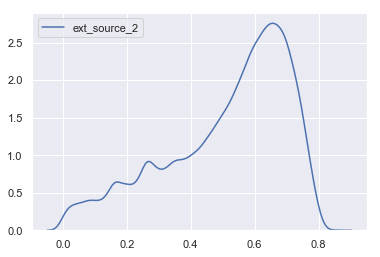

In [31]:
sns.kdeplot(df_train['ext_source_2'])

In [32]:
median = df_train['ext_source_2'].median()
median

0.5659614260608526

In [33]:
idxs = df_train[df_train['ext_source_2'].isnull()]['ext_source_2'].index
for idx in idxs:
    df_train.at[idx, 'ext_source_2'] = mode

idxs = df_test[df_test['ext_source_2'].isnull()]['ext_source_2'].index
for idx in idxs:
    df_test.at[idx, 'ext_source_2'] = mode

## OBS 30 CNT Social Circle

Imputing median

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

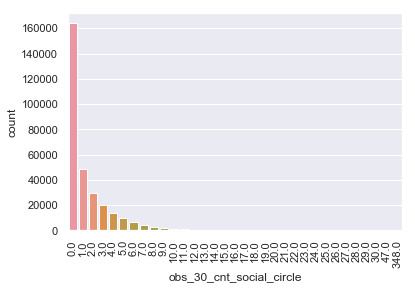

In [34]:
sns.countplot(df_train['obs_30_cnt_social_circle'])
plt.xticks(rotation='vertical')

In [35]:
mode = stats.mode(df_train['obs_30_cnt_social_circle'])[0][0]

idxs = df_train[df_train['obs_30_cnt_social_circle'].isnull()]['obs_30_cnt_social_circle'].index
for idx in idxs:
    df_train.at[idx, 'obs_30_cnt_social_circle'] = mode

idxs = df_test[df_test['obs_30_cnt_social_circle'].isnull()]['obs_30_cnt_social_circle'].index
for idx in idxs:
    df_test.at[idx, 'obs_30_cnt_social_circle'] = mode

## DEF 30 CNT Social Circle

Imputing median

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

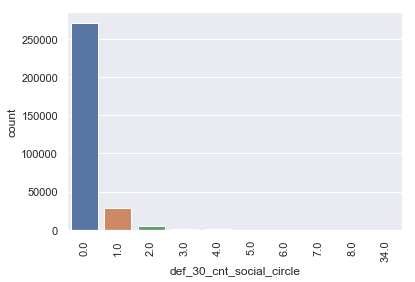

In [36]:
sns.countplot(df_train['def_30_cnt_social_circle'])
plt.xticks(rotation='vertical')

In [37]:
mode = stats.mode(df_train['def_30_cnt_social_circle'])[0][0]

idxs = df_train[df_train['def_30_cnt_social_circle'].isnull()]['def_30_cnt_social_circle'].index
for idx in idxs:
    df_train.at[idx, 'def_30_cnt_social_circle'] = mode

idxs = df_test[df_test['def_30_cnt_social_circle'].isnull()]['def_30_cnt_social_circle'].index
for idx in idxs:
    df_test.at[idx, 'def_30_cnt_social_circle'] = mode

## Days Last Phone Change

Just one missing value

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/blairthurman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


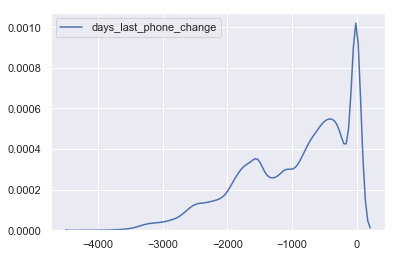

In [38]:
sns.kdeplot(df_train['days_last_phone_change'])

In [39]:
idx = df_train[df_train['days_last_phone_change'].isnull()]['days_last_phone_change'].index[0]
df_train.at[idx, 'days_last_phone_change'] = 0

In [40]:
df_train.head()

,sk_id_curr,target,name_contract_type,is_male,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21
0,100002,1,Cash loans,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_train.to_csv('data/application_train_clean.csv', index=False)
df_test.to_csv('data/application_test_clean.csv', index=False)